## Homework2 

tidyverse 패키지를 사용하여 아래의 문제들을 풀어보도록 합시다. 

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data(diamonds)

In [4]:
diamonds %>% head()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### Q1 다이아몬드의 색에 따른 가격 분포를 알고싶습니다. ggplot 을 활용해 voilin 플롯, 박스플롯을 그려서 분포, 평균 등을 살펴보세요.

### Q2 dplyr 함수들을 사용하여, 다이아몬드의 색 별로 평균 분산을 구해보세요. (Hint: group_by, summarize 사용) 

### Q3 가격이 5000 이하인 다이아몬드들에 대해서, 다이아몬드 색에 따른 가격의 평균과 분산 정보를 Bar plot으로 그려보세요 (bar plot 의 x축은 색, y축은 색에따른 평균가격). 해당 bar plot에 표준편차를 errorbar 로 나타내세요. (Hint: ggplot에서 geom_errorbar 사용)



# Q1

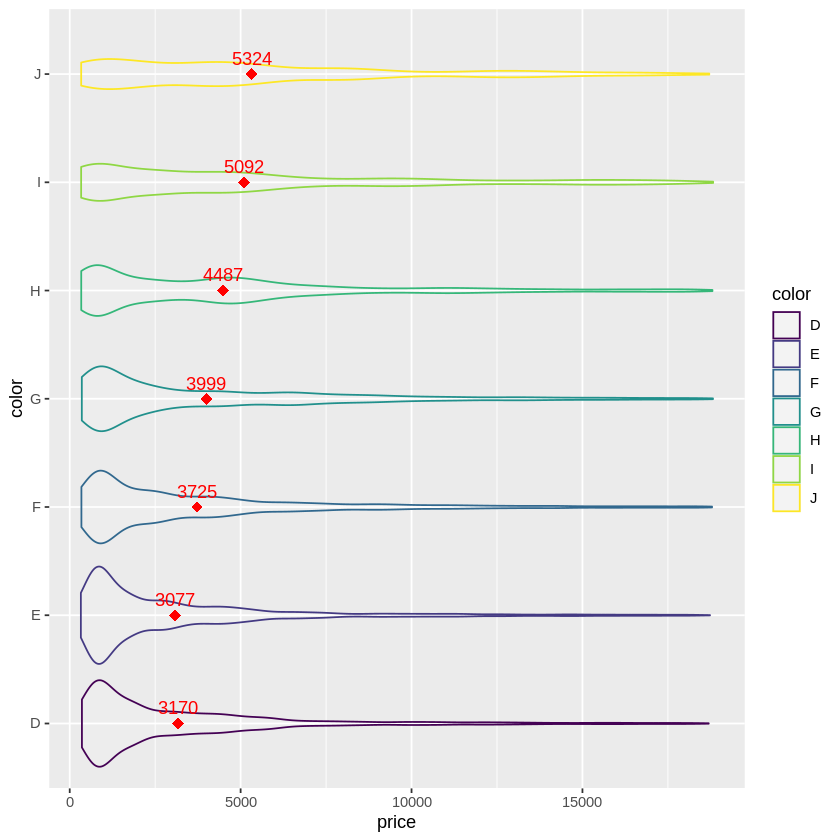

In [117]:
diamonds %>% ggplot(aes(color, price,color=color))+
coord_flip()+
geom_violin(alpha=0.1)+ stat_summary(fun=mean, colour="red", geom="point",shape=18, size=3, show.legend=FALSE)+
 stat_summary(fun=mean, colour="red", geom="text",vjust=-0.7, aes( label=round(..y..)))

In [87]:
diamonds %>% group_by(color) %>% summarise(m=mean(price))

color,m
<ord>,<dbl>
D,3169.954
E,3076.752
F,3724.886
G,3999.136
H,4486.669
I,5091.875
J,5323.818


color 가 I , J인 것이 평균 가격이 높고 D E인 것의 평균가격이 낮았으며 

보통 D,E 색은 가격이 낮은 다이아몬드가 많았다.

단순히 color와 price그래프만 봤을 때 

사람들의 선호하는 색깔의 차이가 가격에 영향을 끼친 것으로 보인다.

#Q2

In [26]:
diamonds %>%
  group_by(color)%>%
  summarise(mean=mean(price),var=var(price))

color,mean,var
<ord>,<dbl>,<dbl>
D,3169.954,11266703
E,3076.752,11183397
F,3724.886,14326164
G,3999.136,16411434
H,4486.669,17774185
I,5091.875,22300945
J,5323.818,19697506


#Q3

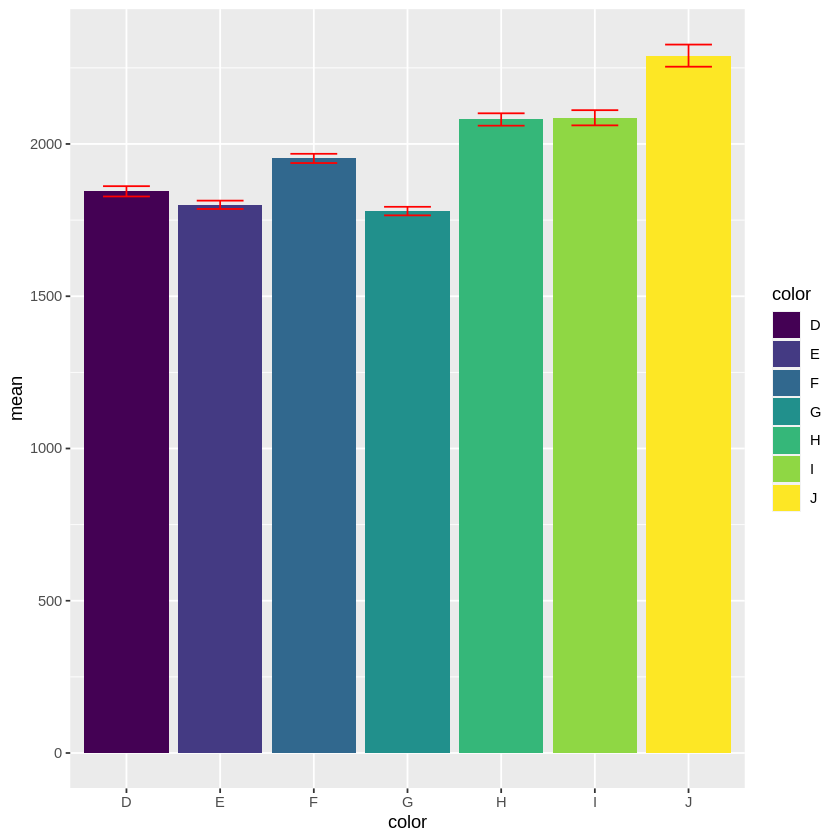

In [76]:
diamonds %>%
  filter(price<=5000) %>%
  group_by(color) %>%
  summarise(mean=mean(price),sd=sd(price),n=length(price))%>%
  ggplot(aes(x=color,y=mean,fill=color))+
  geom_bar(stat='identity')+
  geom_errorbar(aes(x=color,ymin=mean-sd/sqrt(n),ymax=mean+sd/sqrt(n),width=0.5),color='red')
